In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import textwrap

In [10]:
def calc_bootstrap_scores(true,pred):
    # Store the acc scores
    acc_scores = []

    n_bootstrap_samples = 1000

    # Perform bootstrapping
    for _ in range(n_bootstrap_samples):
        # Resample with replacement
        y_true_resampled, y_pred_resampled = resample(true, pred, replace=True)

        # Calculate the F1 score
        acc = accuracy_score(y_true_resampled, y_pred_resampled)
        acc_scores.append(acc)

    # Calculate the average F1 score over all bootstrapped samples
    bootstrap_avg_acc = np.mean(acc_scores)
    bootstrap_std_acc = np.std(acc_scores)

    print(f'Bulk Bootstrap Average Acc Score: {bootstrap_avg_acc}')
    print(f'Bulk Bootstrap Acc Score Standard Deviation: {bootstrap_std_acc}')
    return bootstrap_avg_acc, bootstrap_std_acc

def extract_metrics_from_experiment(output_frame):
    
    ## bulk
    y_true = output_frame.ground_truth.values
    y_pred = (output_frame.parsed_answer == 'B').values
    bootstrap_avg_acc, bootstrap_std_acc = calc_bootstrap_scores(y_true,y_pred)
    
    ## FST 12
    output_12 = output_frame[output_frame.race == 12]
    y_true_12 = output_12.ground_truth.values
    y_pred_12 = (output_12.parsed_answer == 'B').values
    bootstrap_avg_acc_12, bootstrap_std_acc_12 = calc_bootstrap_scores(y_true_12,y_pred_12)
    
    ## FST 56
    output_56 = output_frame[output_frame.race == 56]
    y_true_56 = output_56.ground_truth.values
    y_pred_56 = (output_56.parsed_answer == 'B').values
    bootstrap_avg_acc_56, bootstrap_std_acc_56 = calc_bootstrap_scores(y_true_56,y_pred_56)
    
    return bootstrap_avg_acc, bootstrap_avg_acc_12, bootstrap_avg_acc_56

def plot_experiment_metrics(dataframes, labels, wrap_width=15):
    bulk_accs, fst12_accs, fst56_accs, biases = [], [], [], []
    
    # Extract metrics for each experiment
    for df in dataframes:
        bulk_acc, fst12_acc, fst56_acc = extract_metrics_from_experiment(df)
        
        bulk_accs.append(bulk_acc)
        fst12_accs.append(fst12_acc)
        fst56_accs.append(fst56_acc)
        
        bias = fst12_acc - fst56_acc
        biases.append(bias)
    
    # Wrap the labels to prevent overlap
    wrapped_labels = [textwrap.fill(label, wrap_width) for label in labels]
    
    # Plot 1: Grouped bar plot for bulk accuracy, FST 1/2 accuracy, and FST 5/6 accuracy
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    # Use custom colors for the bars
    bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    rects1 = ax1.bar(x - width, bulk_accs, width, label='Bulk Accuracy', color=bar_colors[0])
    rects2 = ax1.bar(x, fst12_accs, width, label='FST 1/2 Accuracy', color=bar_colors[1])
    rects3 = ax1.bar(x + width, fst56_accs, width, label='FST 5/6 Accuracy', color=bar_colors[2])

    # Add labels, title, and custom ticks
    ax1.set_xlabel('Experiments')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy by Experiment and Skin Type')

    # Set wrapped labels
    ax1.set_xticks(x)
    ax1.set_xticklabels(wrapped_labels)  # Apply wrapped labels

    ax1.legend()
    
    # Plot 2: Bias plot
    fig, ax2 = plt.subplots(figsize=(10, 6))
    rects4 = ax2.bar(x, biases, width, color='purple', label='Bias (FST 1/2 - FST 5/6 Accuracy)')
    
    # Add labels, title, and custom ticks
    ax2.set_xlabel('Experiments')
    ax2.set_ylabel('Bias')
    ax2.set_title('Bias by Experiment')

    # Set wrapped labels for second plot
    ax2.set_xticks(x)
    ax2.set_xticklabels(wrapped_labels)  # Apply wrapped labels
    
    ax2.legend()

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

In [11]:
zero_shot_output = pd.read_csv('ddi_full_output_frame_zero_shot_high_res.csv')
ten_shot_all_56_output = pd.read_csv('ddi_fst56_10_shot_high_res.csv')
ten_shot_56_and_12_output = pd.read_csv('ddi_fst12_and_fst56_10_shot_high_res.csv')
ten_shot_balanced_output = pd.read_csv('ddi_fst12_and_fst56_balanced_base_rate_15_and_5_shot_high_res.csv')

dataframes = [zero_shot_output,ten_shot_all_56_output,ten_shot_56_and_12_output,ten_shot_balanced_output]

In [12]:
labels = ['Zero Shot', '10-shot, all FST 5/6 sampled randomly', 
          '10-shot from each combination [FST12,FST56], [Benign,Malignant]',
          'FST12+Benign 15, FST12+Malignant 5, FST56+Benign 15, FST56+Malignant 5']

Bulk Bootstrap Average Acc Score: 0.7026923076923076
Bulk Bootstrap Acc Score Standard Deviation: 0.04401242092030694
Bulk Bootstrap Average Acc Score: 0.7473461538461538
Bulk Bootstrap Acc Score Standard Deviation: 0.06303163242682623
Bulk Bootstrap Average Acc Score: 0.6521153846153847
Bulk Bootstrap Acc Score Standard Deviation: 0.06648925481547496
Bulk Bootstrap Average Acc Score: 0.34800961538461533
Bulk Bootstrap Acc Score Standard Deviation: 0.04608343086025682
Bulk Bootstrap Average Acc Score: 0.34798076923076926
Bulk Bootstrap Acc Score Standard Deviation: 0.0694972834810297
Bulk Bootstrap Average Acc Score: 0.34486538461538463
Bulk Bootstrap Acc Score Standard Deviation: 0.06669088533218413
Bulk Bootstrap Average Acc Score: 0.5657307692307693
Bulk Bootstrap Acc Score Standard Deviation: 0.0480606741771988
Bulk Bootstrap Average Acc Score: 0.6137692307692308
Bulk Bootstrap Acc Score Standard Deviation: 0.07108870198769886
Bulk Bootstrap Average Acc Score: 0.5162307692307692
Bu

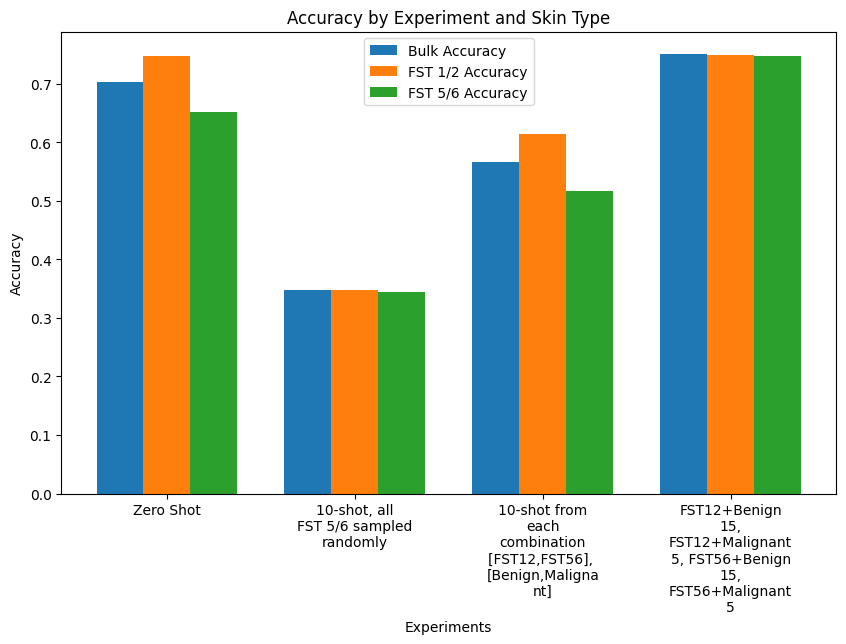

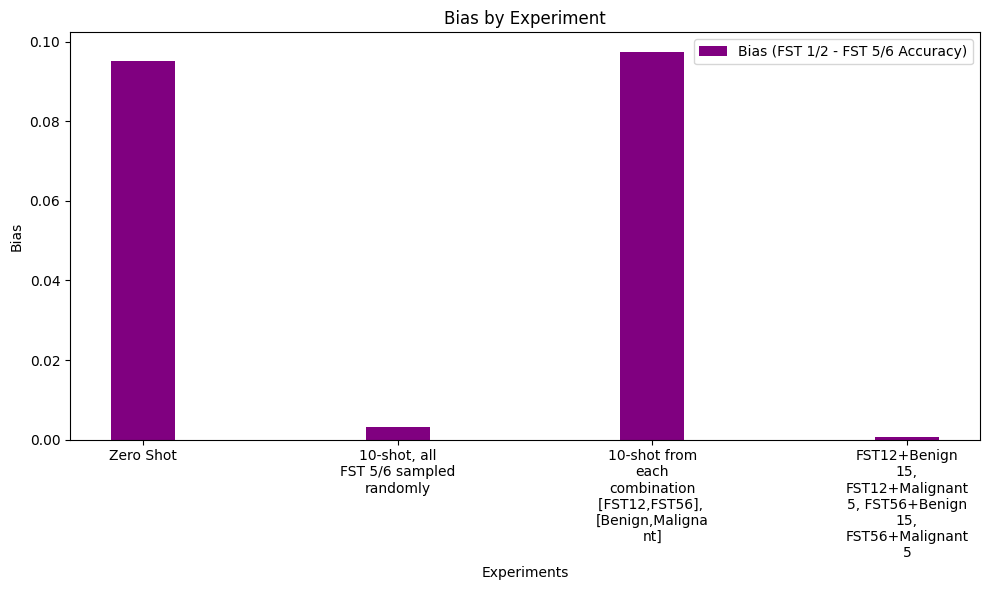

In [15]:
plot_experiment_metrics(dataframes, labels)